# Instalação de Pacotes Necessários
Para rodar este notebook, certifique-se de que os seguintes pacotes estão instalados:

- numpy
- pandas
- matplotlib
- tensorflow
- sklearn

Você pode instalar esses pacotes usando os seguintes comandos:

```python
!pip install numpy pandas matplotlib tensorflow scikit-learn


## 1. Séries Temporais: Previsão de Preços de Ações

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5684 - val_loss: 0.4090
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3957 - val_loss: 0.3716
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3634 - val_loss: 0.3437
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3029 - val_loss: 0.3313
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2725 - val_loss: 0.3321
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


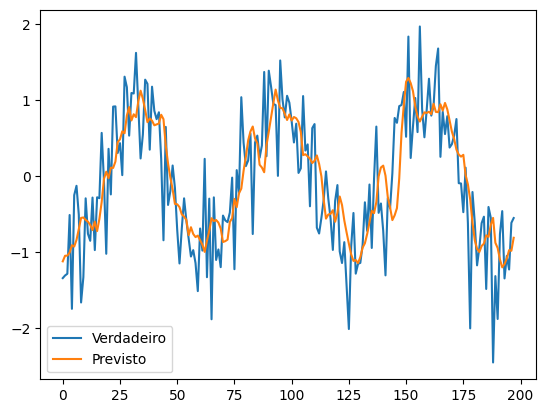

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Gerando dados de exemplo (série temporal simples)
time = np.arange(0, 100, 0.1)
data = np.sin(time) + 0.5 * np.random.randn(len(time))

# Preparando os dados para a previsão
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]
        X.append(a)
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividindo os dados em treino e teste
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Construindo o modelo LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

# Compilando e treinando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

# Fazendo previsões
predictions = model.predict(X_test)
plt.plot(Y_test, label='Verdadeiro')
plt.plot(predictions, label='Previsto')
plt.legend()
plt.show()

#### Exemplo extra

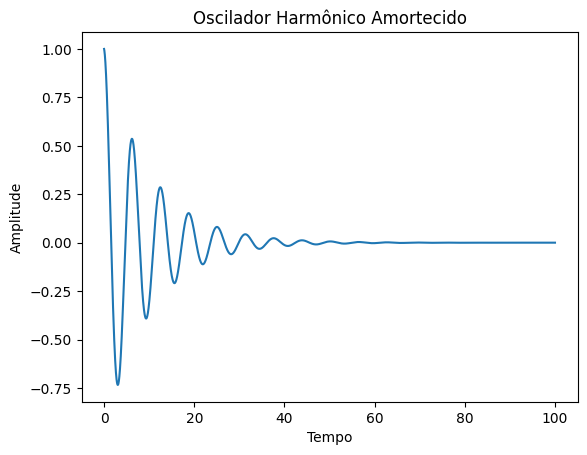

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Gerando dados de exemplo para um oscilador harmônico amortecido
def damped_oscillator(t, gamma, omega0):
    return np.exp(-gamma * t) * np.cos(omega0 * t)

dt = 0.01
time = np.arange(0, 100, dt)
gamma = 0.1
omega0 = 1.0
data = damped_oscillator(time, gamma, omega0)

# Visualizando os dados
plt.plot(time, data)
plt.title('Oscilador Harmônico Amortecido')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.show()




Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0048 - val_loss: 8.3421e-08
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3328e-04 - val_loss: 8.4123e-06
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.1065e-04 - val_loss: 1.2496e-06
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.9574e-05 - val_loss: 1.8355e-05
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.1482e-05 - val_loss: 1.6524e-07
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.5633e-05 - val_loss: 1.9607e-06
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.7439e-05 - val_loss: 4.8963e-06
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.8022e-05 - val_loss: 8.0470e-07
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.6767e-05 - val_loss: 2.8819e-06
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.3463e-05 - val_loss: 2.9385e-06
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss:

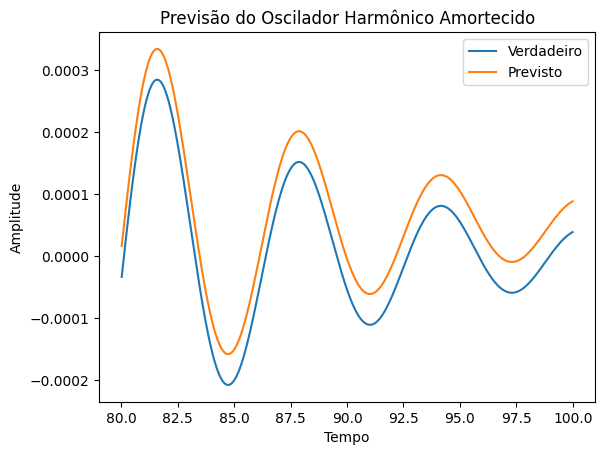

In [21]:
# Preparando os dados para a previsão
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]
        X.append(a)
        Y.append(data[i + time_step])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividindo os dados em treino e teste
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Construindo o modelo LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

# Compilando e treinando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

# Fazendo previsões
predictions = model.predict(X_test)

# Visualizando os resultados
plt.plot(time[len(time)-len(Y_test):], Y_test, label='Verdadeiro')
plt.plot(time[len(time)-len(Y_test):], predictions, label='Previsto')
plt.legend()
plt.title('Previsão do Oscilador Harmônico Amortecido')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.show()

## Entendendo melhor como configurar melhores previsões

### Ajustando Parâmetros para Melhorar Previsões: Explicação para Leigos com Exemplos e Analogias

Quando treinamos um modelo de aprendizado de máquina para fazer previsões, é como afinar um instrumento musical: precisamos ajustar várias "cordas" ou parâmetros para que a "música" (ou previsões) saia da melhor maneira possível. Aqui estão algumas das principais "cordas" que podemos ajustar:

1. **time_step (passo de tempo)**:
   - Imagine que você está tentando prever o tempo amanhã olhando para o histórico dos últimos dias. O `time_step` é como o número de dias que você olha para trás. Se você olhar apenas para o dia anterior, seu `time_step` é 1. Se você olhar para os últimos 10 dias, seu `time_step` é 10.
  
2. **Número de Unidades LSTM (neurônios na camada LSTM)**:
   - Pense nisso como a quantidade de cérebros ou processadores que estão trabalhando juntos para analisar os dados. Ter mais unidades é como ter mais cérebros analisando os dados, o que pode ajudar a fazer previsões mais precisas, mas também pode tornar o processo mais lento e complexo.

3. **Número de Camadas LSTM**:
   - Isso é como empilhar várias camadas de análise. Imagine que você tem um grupo de especialistas analisando informações. Se você tiver várias camadas, cada grupo de especialistas passa suas conclusões para o próximo grupo, adicionando mais profundidade à análise.

4. **Função de Ativação**:
   - É como o "estilo" de pensamento que os cérebros usam. Diferentes funções de ativação fazem com que os neurônios processem as informações de maneiras ligeiramente diferentes, como pessoas que resolvem problemas usando diferentes abordagens.

5. **Número de Épocas**:
   - Uma época é como revisar um livro várias vezes. Se você revisar um livro uma vez (1 época), você pode não captar todos os detalhes. Revisar o livro várias vezes (muitas épocas) ajuda a entender melhor e a capturar mais detalhes.

6. **Batch Size (tamanho do lote)**:
   - Imagine que você está aprendendo a cozinhar e decide praticar fazendo várias receitas ao mesmo tempo. O `batch size` é como o número de receitas que você pratica de uma vez. Um lote maior significa que você pratica mais de uma vez antes de parar para revisar e ajustar sua técnica.

### Realizando Experimentos

Para descobrir quais ajustes resultam nas melhores previsões, fazemos experimentos. Em cada experimento, ajustamos uma "corda" ou parâmetro enquanto mantemos os outros constantes. Aqui estão algumas etapas para experimentar diferentes configurações:

#### 1. Ajustando `time_step`

Vamos começar experimentando diferentes valores para o `time_step`.

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0059 - val_loss: 1.2523e-06
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.9497e-05 - val_loss: 1.5485e-05
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.4124e-05 - val_loss: 3.7688e-06
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.6638e-05 - val_loss: 2.8326e-08
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.9358e-05 - val_loss: 4.2596e-06
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


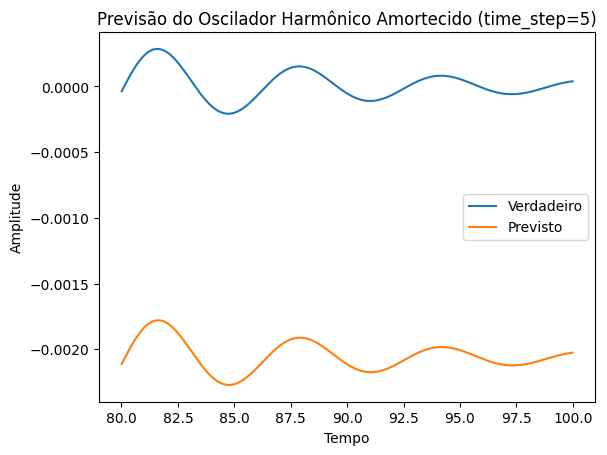

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0032 - val_loss: 1.6596e-07
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.1204e-04 - val_loss: 1.2590e-05
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.0621e-04 - val_loss: 1.5792e-06
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.0379e-04 - val_loss: 2.2698e-05
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.6713e-05 - val_loss: 1.6661e-05
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


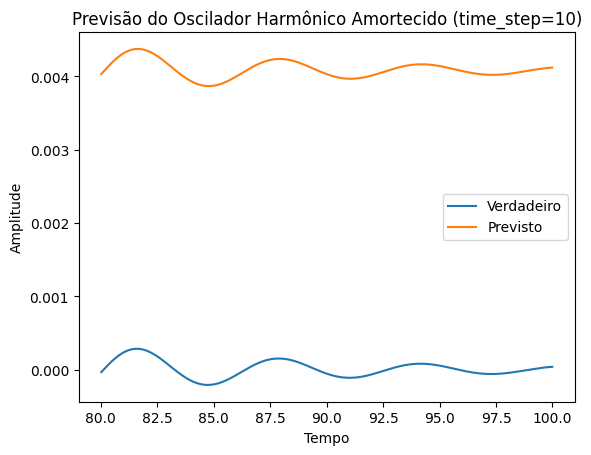

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0040 - val_loss: 1.9921e-06
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.2726e-04 - val_loss: 1.1470e-05
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 6.4409e-05 - val_loss: 1.5811e-07
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.7335e-05 - val_loss: 1.8781e-07
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 7.5127e-06 - val_loss: 1.9059e-07
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


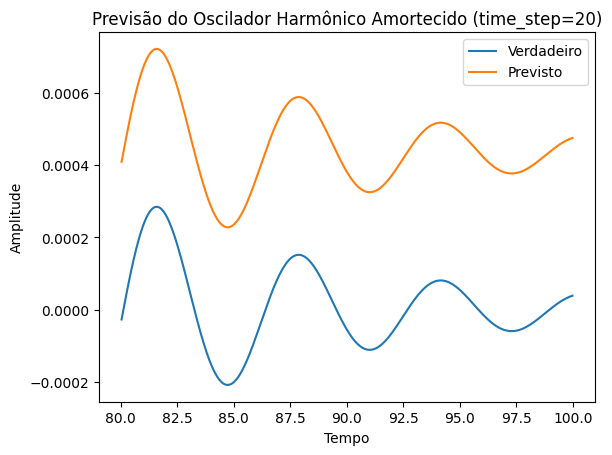

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0022 - val_loss: 6.0696e-08
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 1.0572e-05 - val_loss: 5.1440e-08
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 9.4589e-06 - val_loss: 2.7526e-07
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 9.4388e-06 - val_loss: 1.4220e-06
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 1.7784e-06 - val_loss: 1.6667e-08
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


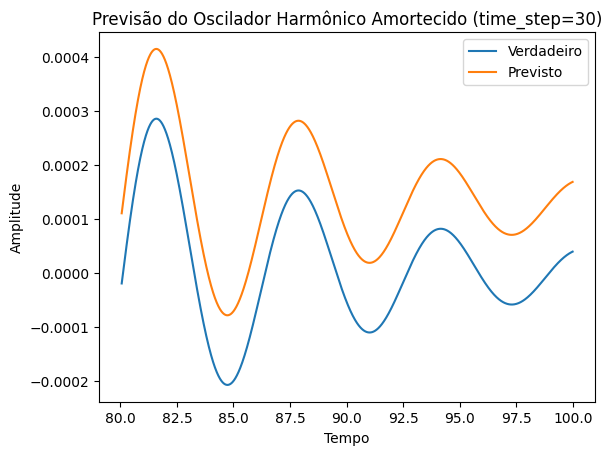

In [23]:
time_steps = [5, 10, 20, 30]

for time_step in time_steps:
    X, Y = create_dataset(data, time_step)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    train_size = int(len(X) * 0.8)
    test_size = len(X) - train_size
    X_train, X_test = X[0:train_size], X[train_size:len(X)]
    Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]
    
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
        LSTM(50, return_sequences=False),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))
    
    predictions = model.predict(X_test)
    plt.plot(time[len(time)-len(Y_test):], Y_test, label='Verdadeiro')
    plt.plot(time[len(time)-len(Y_test):], predictions, label='Previsto')
    plt.legend()
    plt.title(f'Previsão do Oscilador Harmônico Amortecido (time_step={time_step})')
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')
    plt.show()

#### 2. Ajustando o Número de Unidades LSTM

Em seguida, ajustamos o número de "cérebros" ou unidades LSTM.

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0071 - val_loss: 2.4915e-10
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.7794e-04 - val_loss: 2.9803e-05
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 8.0740e-05 - val_loss: 4.1610e-08
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 1.8413e-05 - val_loss: 5.5818e-07
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 1.6218e-05 - val_loss: 5.2447e-07
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


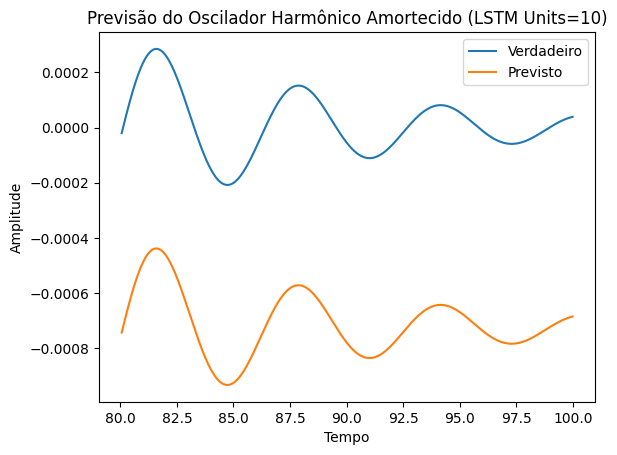

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0028 - val_loss: 6.2502e-05
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 6.0714e-05 - val_loss: 1.8324e-07
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 7.2908e-06 - val_loss: 3.7390e-09
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 2.7975e-06 - val_loss: 3.0508e-08
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 9.0256e-06 - val_loss: 6.4386e-10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


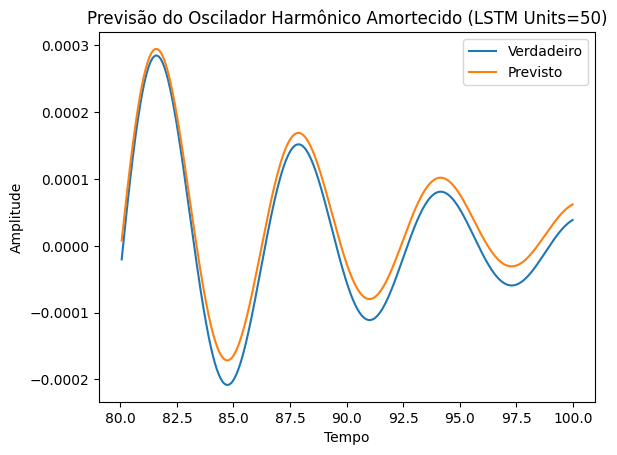

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - loss: 0.0014 - val_loss: 3.2566e-06
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - loss: 2.2796e-05 - val_loss: 1.6573e-07
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 4.7663e-06 - val_loss: 3.0476e-07
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 7.1457e-07 - val_loss: 2.2096e-07
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 9.1393e-06 - val_loss: 6.0478e-08
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


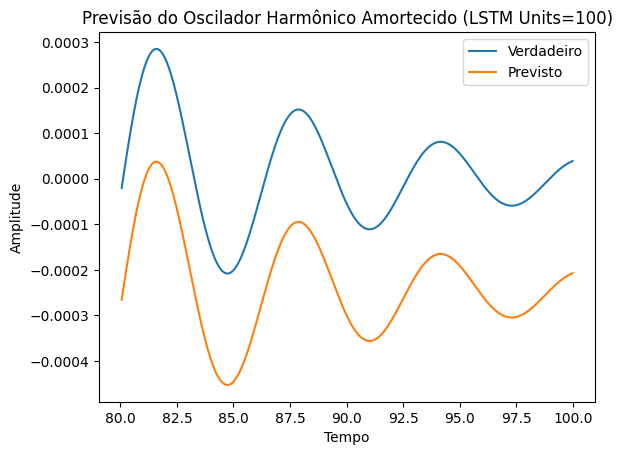

In [24]:
lstm_units = [10, 50, 100]

for units in lstm_units:
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(time_step, 1)),
        LSTM(units, return_sequences=False),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))
    
    predictions = model.predict(X_test)
    plt.plot(time[len(time)-len(Y_test):], Y_test, label='Verdadeiro')
    plt.plot(time[len(time)-len(Y_test):], predictions, label='Previsto')
    plt.legend()
    plt.title(f'Previsão do Oscilador Harmônico Amortecido (LSTM Units={units})')
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')
    plt.show()

#### 3. Ajustando o Número de Camadas LSTM

Agora, ajustamos o número de camadas de análise ou camadas LSTM.

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0043 - val_loss: 4.9601e-06
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 4.3062e-05 - val_loss: 6.2182e-08
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 1.5862e-05 - val_loss: 1.6694e-06
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 8.8422e-06 - val_loss: 3.2589e-08
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 5.0067e-06 - val_loss: 7.9094e-09
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


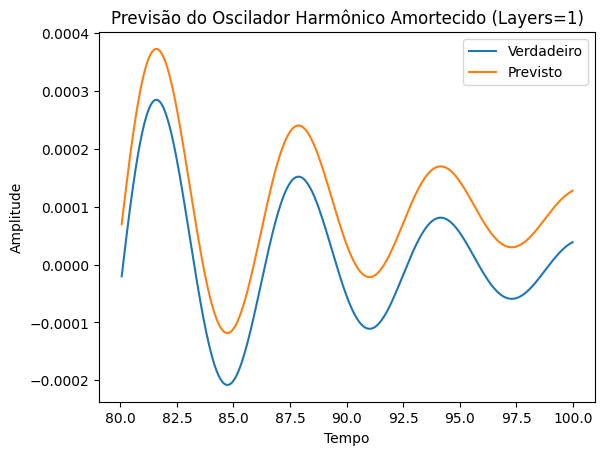

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.0032 - val_loss: 3.1777e-07
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 1.5746e-04 - val_loss: 4.8071e-06
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 9.0670e-06 - val_loss: 3.2444e-06
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 3.2902e-05 - val_loss: 8.1063e-08
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 1.7129e-05 - val_loss: 2.7770e-07
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


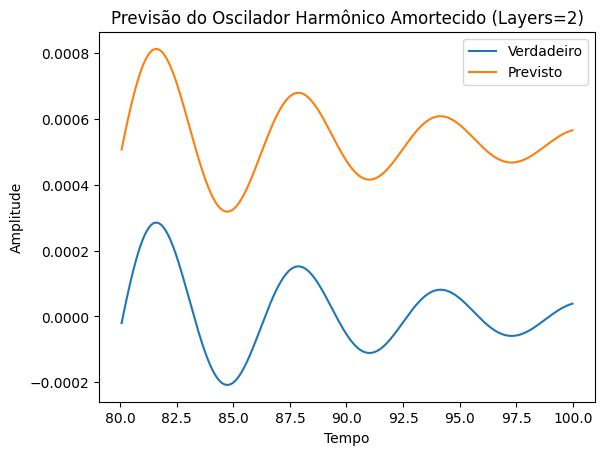

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - loss: 0.0030 - val_loss: 3.2456e-08
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 1.6061e-04 - val_loss: 5.2783e-05
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 3.9813e-05 - val_loss: 6.0565e-05
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 7.5988e-05 - val_loss: 2.6192e-06
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 4.4460e-05 - val_loss: 1.5233e-05
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


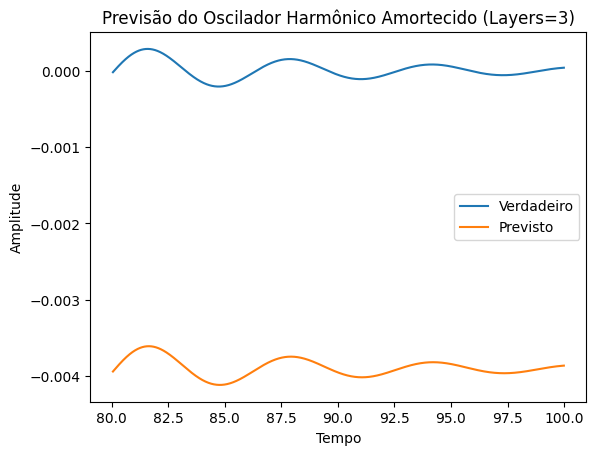

In [25]:
layers = [1, 2, 3]

for num_layers in layers:
    model = Sequential()
    for i in range(num_layers):
        if i == 0:
            model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
        else:
            model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))
    
    predictions = model.predict(X_test)
    plt.plot(time[len(time)-len(Y_test):], Y_test, label='Verdadeiro')
    plt.plot(time[len(time)-len(Y_test):], predictions, label='Previsto')
    plt.legend()
    plt.title(f'Previsão do Oscilador Harmônico Amortecido (Layers={num_layers})')
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')
    plt.show()

#### 4. Ajustando o Número de Épocas

Vamos ajustar o número de vezes que revisamos o "livro" ou o número de épocas.

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0037 - val_loss: 8.0200e-07
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 2.1327e-05 - val_loss: 1.1097e-06
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 6.4133e-06 - val_loss: 1.4170e-08
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 2.9298e-05 - val_loss: 6.1147e-09
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 2.8151e-06 - val_loss: 2.7188e-06
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


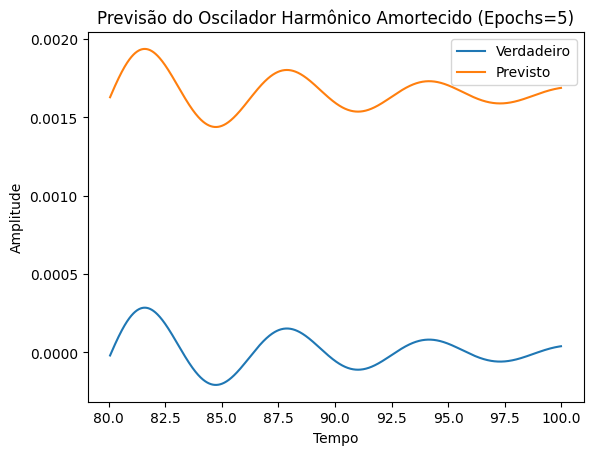

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0030 - val_loss: 1.6766e-06
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 6.1110e-05 - val_loss: 2.1432e-06
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 5.9434e-05 - val_loss: 1.6319e-07
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 2.7388e-05 - val_loss: 1.5202e-07
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 2.0986e-06 - val_loss: 4.2562e-09
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 1.0379e-05 - val_loss: 8.5275e-08
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 1.6668e-06 - val_loss: 1.5877e-06
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 2.4823e-06 - val_loss: 1.4326e-06
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 1.6473e-06 - val_loss: 1.8301e-08
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 5.3082e-06 - val_loss: 2.4400e-07
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


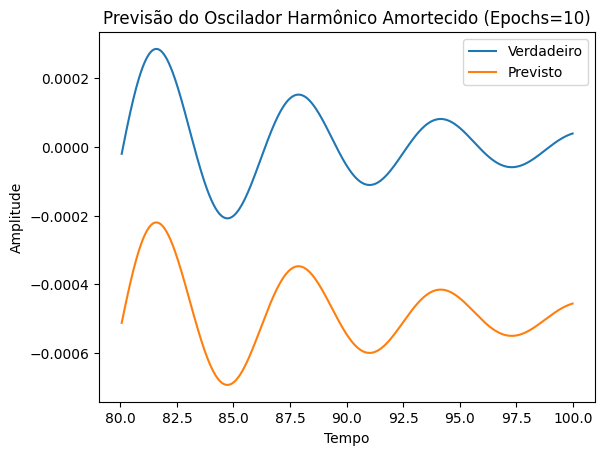

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0025 - val_loss: 1.4305e-05
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 3.6167e-05 - val_loss: 2.1443e-08
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 1.3660e-05 - val_loss: 3.3838e-07
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 2.6517e-06 - val_loss: 1.1883e-06
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 9.2411e-06 - val_loss: 1.4690e-09
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 7.4891e-06 - val_loss: 4.3832e-08
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1.3941e-06 - val_loss: 1.3283e-08
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 2.6067e-06 - val_loss: 4.0938e-07
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 1.1187e-06 - val_loss: 2.1155e-06
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 1.4633e-05 - val_loss: 6.5798e-07
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 23m

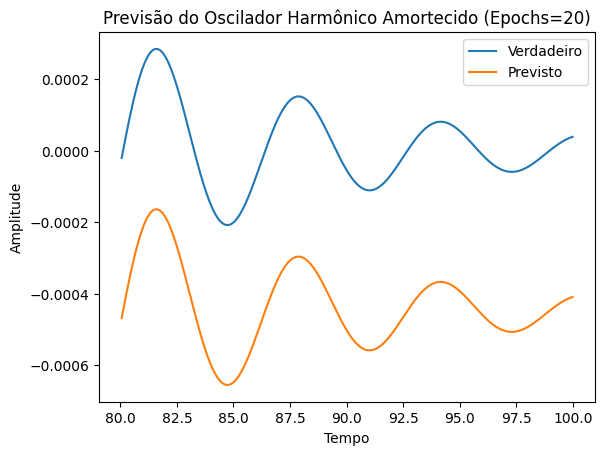

In [26]:
epochs_list = [5, 10, 20]

for epochs in epochs_list:
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
        LSTM(50, return_sequences=False),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test))
    
    predictions = model.predict(X_test)
    plt.plot(time[len(time)-len(Y_test):], Y_test, label='Verdadeiro')
    plt.plot(time[len(time)-len(Y_test):], predictions, label='Previsto')
    plt.legend()
    plt.title(f'Previsão do Oscilador Harmônico Amortecido (Epochs={epochs})')
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')
    plt.show()

#### 5. Ajustando o Batch Size

Finalmente, ajustamos o número de "receitas" que praticamos de uma vez, ou o tamanho do lote.

Epoch 1/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0020 - val_loss: 2.9460e-06
Epoch 2/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 1.1974e-05 - val_loss: 2.1007e-07
Epoch 3/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 1.1106e-05 - val_loss: 2.3054e-06
Epoch 4/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 1.9027e-05 - val_loss: 1.5025e-08
Epoch 5/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 2.4249e-06 - val_loss: 3.6295e-05
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


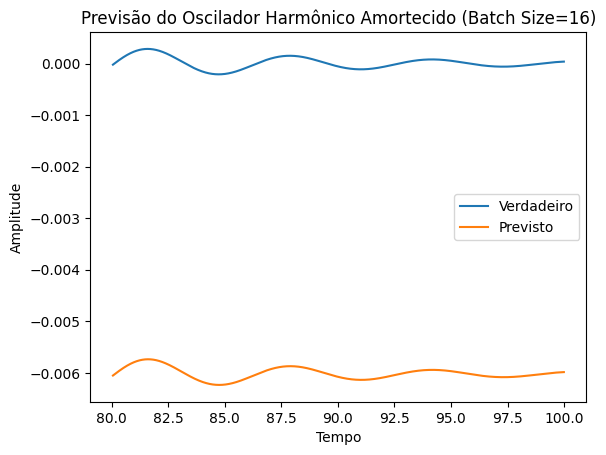

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0014 - val_loss: 3.3124e-06
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 2.6598e-05 - val_loss: 1.8106e-06
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1.0135e-05 - val_loss: 2.1918e-06
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 4.5494e-06 - val_loss: 2.7840e-07
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 1.7741e-05 - val_loss: 6.1510e-07
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


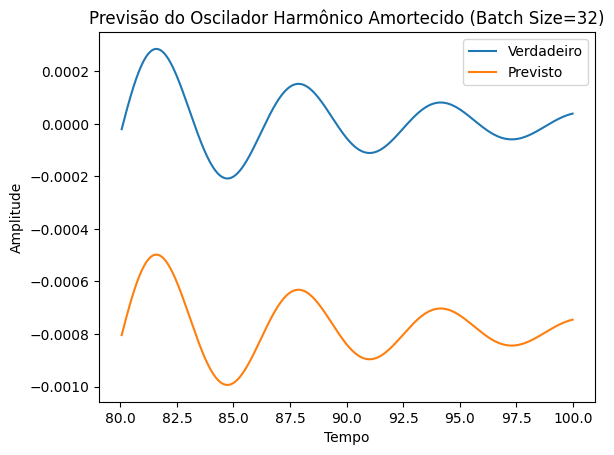

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0030 - val_loss: 1.1329e-07
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 9.3043e-05 - val_loss: 1.7961e-08
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 6.5691e-06 - val_loss: 5.3690e-07
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 3.2412e-06 - val_loss: 4.8623e-08
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 5.5249e-06 - val_loss: 1.3942e-07
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


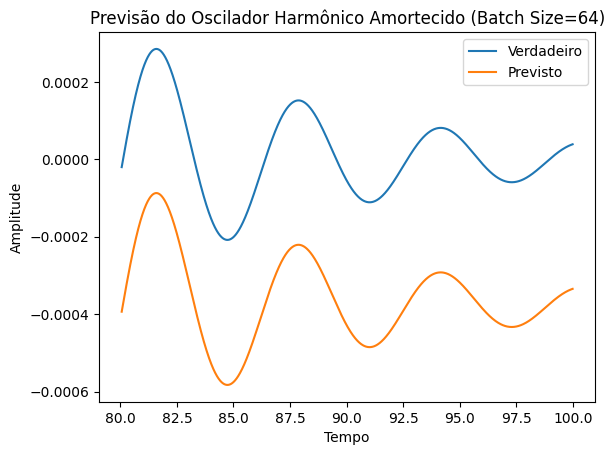

In [27]:
batch_sizes = [16, 32, 64]

for batch_size in batch_sizes:
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
        LSTM(50, return_sequences=False),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=5, batch_size=batch_size, validation_data=(X_test, Y_test))
    
    predictions = model.predict(X_test)
    plt.plot(time[len(time)-len(Y_test):], Y_test, label='Verdadeiro')
    plt.plot(time[len(time)-len(Y_test):], predictions, label='Previsto')
    plt.legend()
    plt.title(f'Previsão do Oscilador Harmônico Amortecido (Batch Size={batch_size})')
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')
    plt.show()

### Conclusão

Para descobrir quais ajustes resultam nas melhores previsões, realizamos experimentos ajustando cada um desses parâmetros. Esse processo de experimentação e ajuste fino é essencial para encontrar a configuração ideal do modelo para o seu problema específico. É como testar diferentes afinações e técnicas até encontrar a melhor maneira de tocar uma música!